<a href="https://colab.research.google.com/github/malyadri6761/innovateintern/blob/main/customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
data = pd.read_excel(url)

# Display the first few rows of the dataset
print(data.head())


# Drop rows with missing CustomerID and remove negative quantities
data.dropna(subset=['CustomerID'], inplace=True)
data = data[data['Quantity'] > 0]


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [ ]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
data['CustomerID'].value_counts()

CustomerID
17841.0    7847
14911.0    5677
14096.0    5111
12748.0    4596
14606.0    2700
           ... 
15313.0       1
17846.0       1
13185.0       1
16953.0       1
16737.0       1
Name: count, Length: 4339, dtype: int64

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [6]:
data.isnull().sum().sum()

0

In [5]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397924.000000,397924,397924.000000,397924.000000
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.420210,NaN,22.096788,1713.169877


In [8]:
# Total sales
data['TotalSales'] = data['Quantity'] * data['UnitPrice']
total_sales = data['TotalSales'].sum()
print(f"Total Sales: {total_sales}")

# Average sales per invoice
avg_sales_per_invoice = data.groupby('InvoiceNo')['TotalSales'].sum().mean()
print(f"Average Sales per Invoice: {avg_sales_per_invoice}")


Total Sales: 8911407.904
Average Sales per Invoice: 480.7621873111782


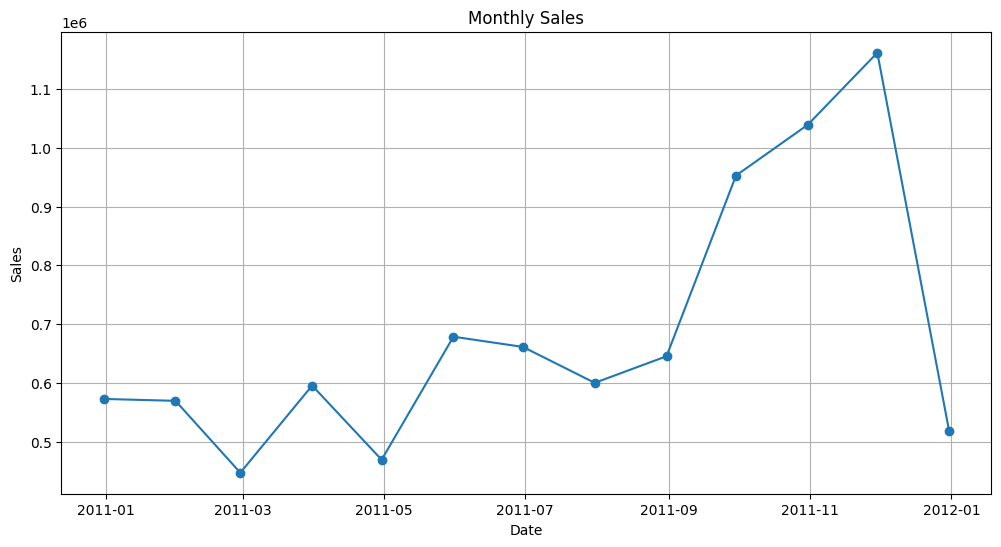

In [10]:
import matplotlib.pyplot as plt

# Resample data to monthly sales
monthly_sales = data.resample('M', on='InvoiceDate')['TotalSales'].sum()

# Plot monthly sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


<ipython-input-3-d436151ceba1>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.index, y=country_sales.values, palette="viridis")


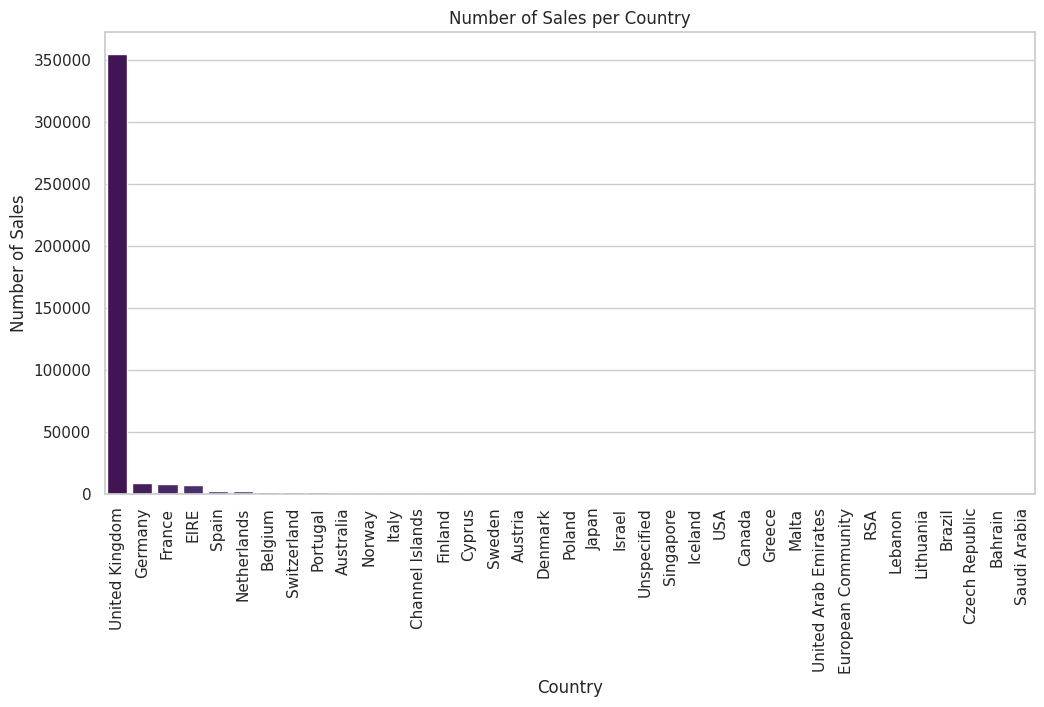

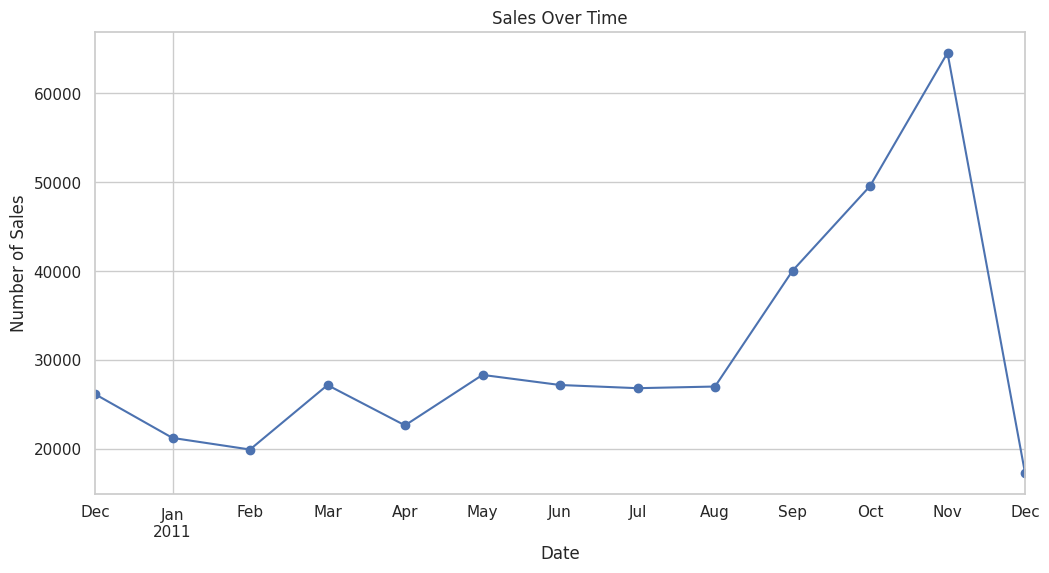

<ipython-input-3-d436151ceba1>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="magma")


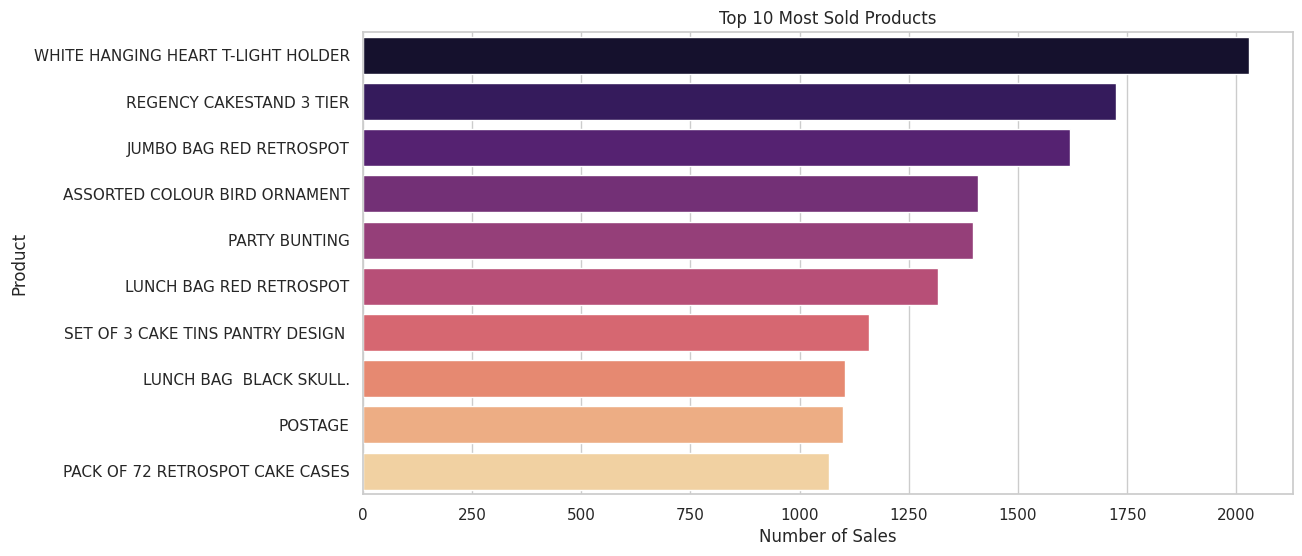

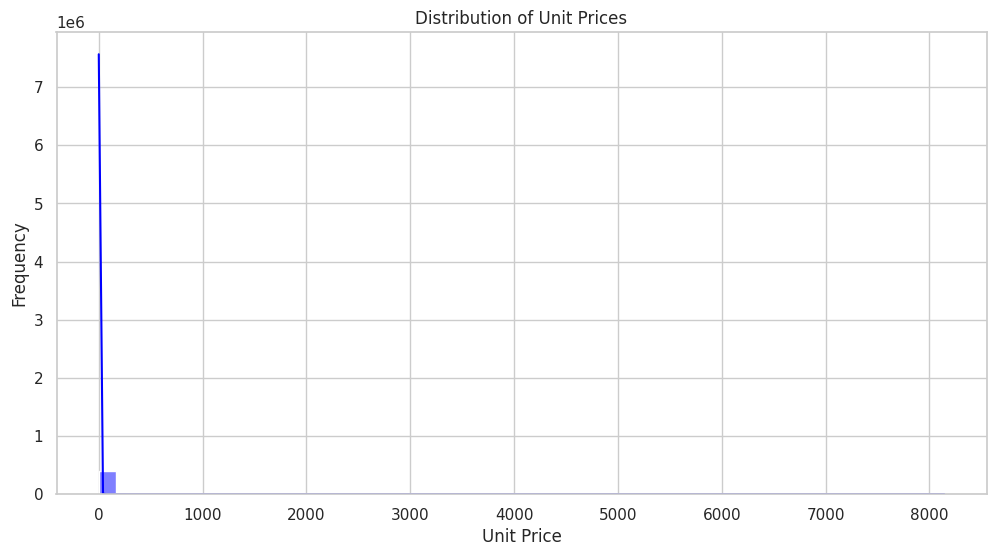

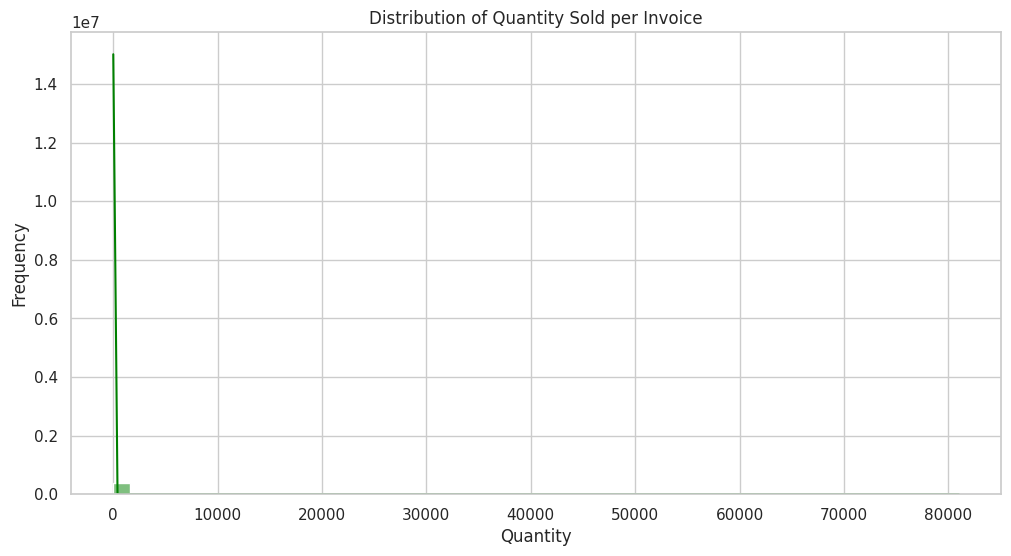

<ipython-input-3-d436151ceba1>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_sales.index, y=customer_sales.values, palette="coolwarm")


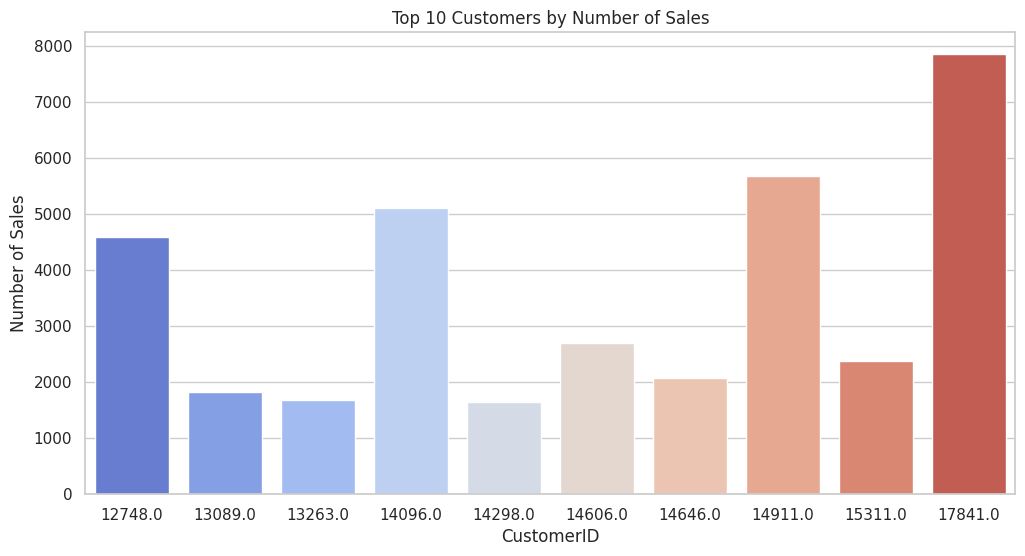

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (assuming you have it in a CSV file named 'sales_data.csv')


# Convert 'InvoiceDate' to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Number of sales per country
plt.figure(figsize=(12, 6))
country_sales = data['Country'].value_counts()
sns.barplot(x=country_sales.index, y=country_sales.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Number of Sales per Country')
plt.xlabel('Country')
plt.ylabel('Number of Sales')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


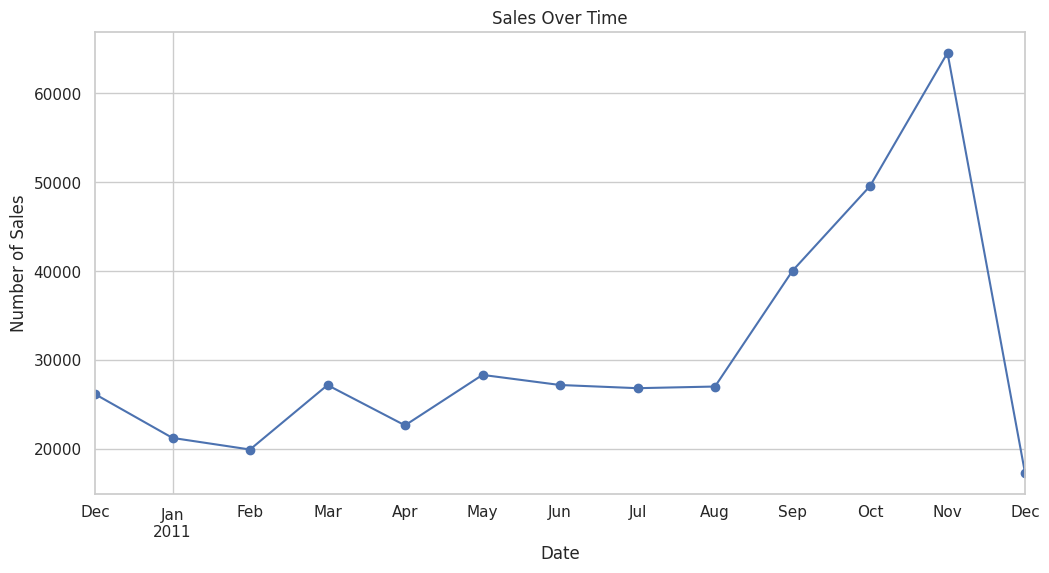

In [ ]:
# 2. Sales over time
plt.figure(figsize=(12, 6))
sales_over_time = data.set_index('InvoiceDate').resample('M')['InvoiceNo'].count()
sales_over_time.plot(marker='o')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-12-2e843ca2e9e2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="magma")


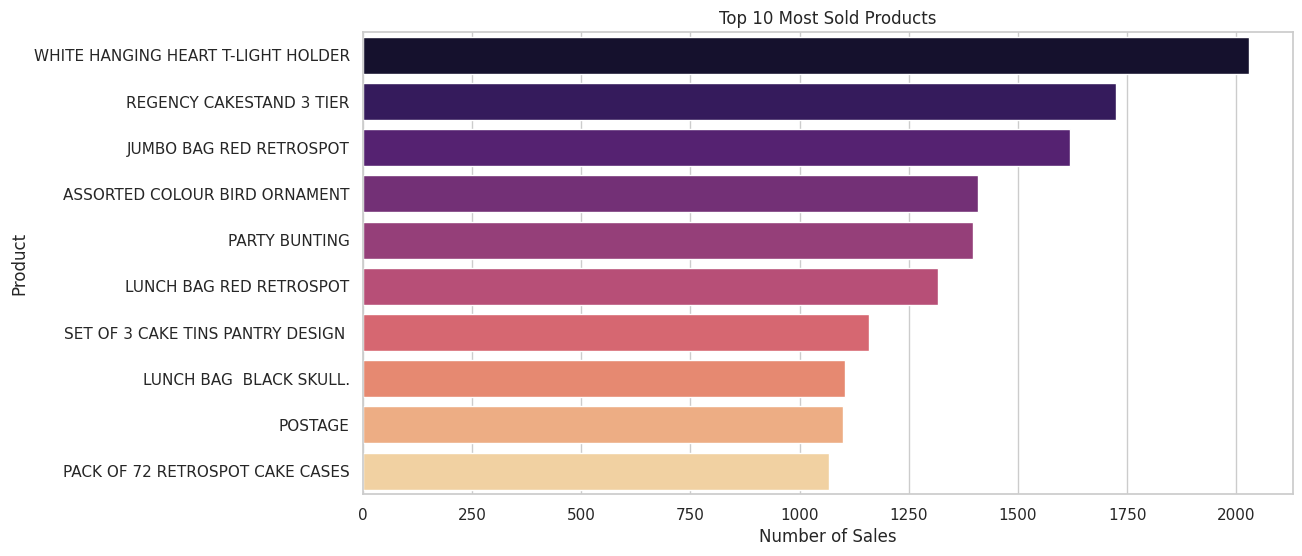

In [ ]:
# 3. Top 10 most sold products
plt.figure(figsize=(12, 6))
top_products = data['Description'].value_counts().head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette="magma")
plt.title('Top 10 Most Sold Products')
plt.xlabel('Number of Sales')
plt.ylabel('Product')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


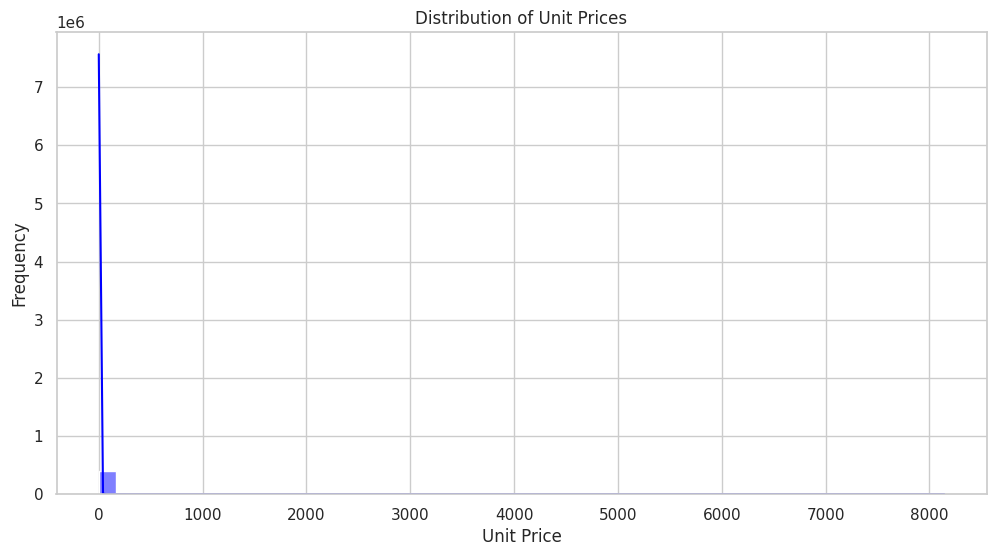

In [ ]:
# 4. Distribution of Unit Prices
plt.figure(figsize=(12, 6))
sns.histplot(data['UnitPrice'], bins=50, kde=True, color='blue')
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


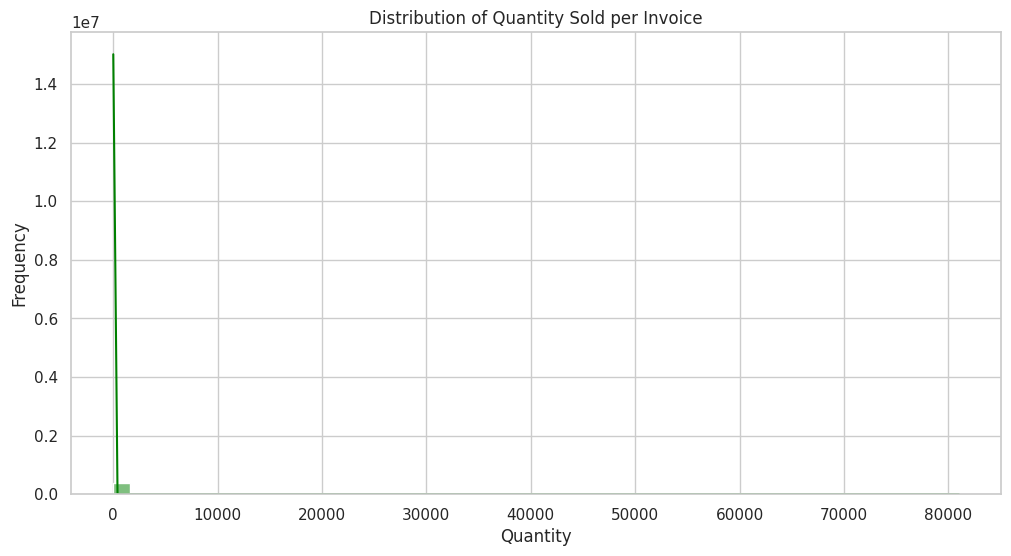

In [ ]:
# 5. Quantity sold per invoice
plt.figure(figsize=(12, 6))
sns.histplot(data['Quantity'], bins=50, kde=True, color='green')
plt.title('Distribution of Quantity Sold per Invoice')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-15-306ede606309>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_sales.index, y=customer_sales.values, palette="coolwarm")


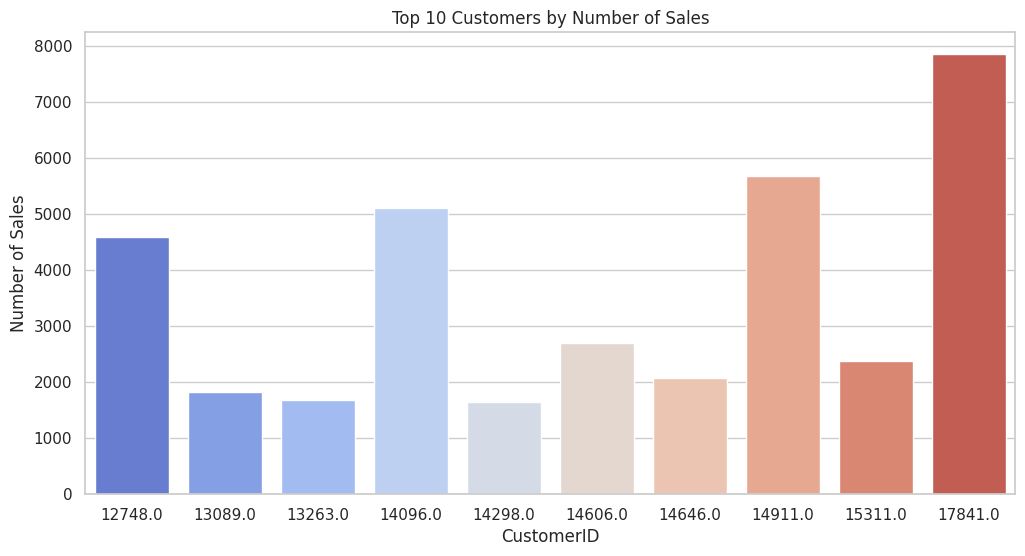

In [ ]:
# 6. Sales by customer
plt.figure(figsize=(12, 6))
customer_sales = data.groupby('CustomerID')['InvoiceNo'].count().sort_values(ascending=False).head(10)
sns.barplot(x=customer_sales.index, y=customer_sales.values, palette="coolwarm")
plt.title('Top 10 Customers by Number of Sales')
plt.xlabel('CustomerID')
plt.ylabel('Number of Sales')
plt.show()


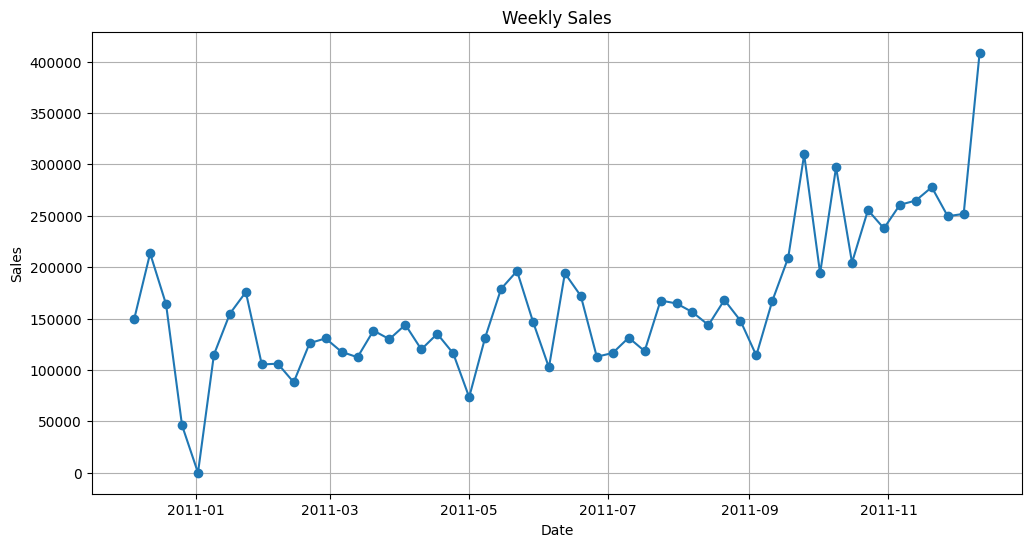

In [13]:
# Resample data to weekly sales
weekly_sales = data.resample('W', on='InvoiceDate')['TotalSales'].sum()

# Plot weekly sales
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales.index, weekly_sales.values, marker='o')
plt.title('Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


            Quantity  UnitPrice  TotalSales
Quantity    1.000000  -0.004561    0.908812
UnitPrice  -0.004561   1.000000    0.081646
TotalSales  0.908812   0.081646    1.000000


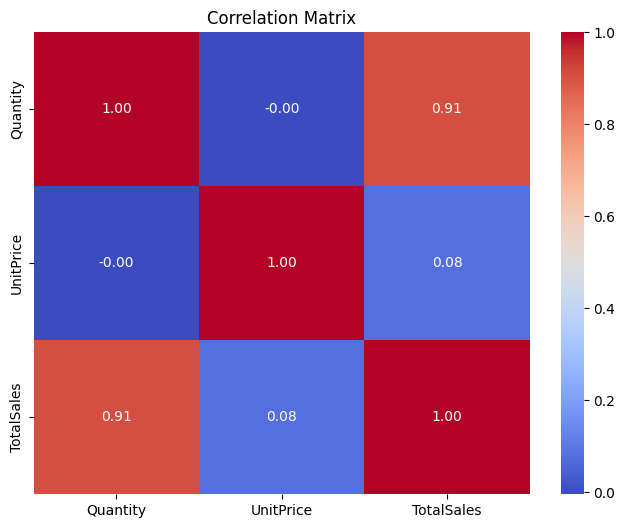

In [15]:
# Compute correlation matrix
correlation_matrix = data[['Quantity', 'UnitPrice', 'TotalSales']].corr()

print(correlation_matrix)

# Plot correlation matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [19]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load the data
# data = pd.read_csv('sales_data.csv')

# Convert 'InvoiceDate' to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Create a basket matrix where rows are invoices and columns are products
basket = (data.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# Convert quantities to boolean values (True if purchased, False if not)
basket = basket.applymap(lambda x: x >= 1)

# Apply the Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=4)

# Print the rules
print(rules)

# Optional: Save the rules to a CSV file
rules.to_csv('association_rules.csv', index=False)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                          antecedents  \
0                         (ALARM CLOCK BAKELIKE RED )   
1                        (ALARM CLOCK BAKELIKE GREEN)   
2                         (ALARM CLOCK BAKELIKE RED )   
3                         (ALARM CLOCK BAKELIKE PINK)   
4                              (DOLLY GIRL LUNCH BOX)   
..                                                ...   
69  (GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...   
70  (ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...   
71                  (GREEN REGENCY TEACUP AND SAUCER)   
72                 (ROSES REGENCY TEACUP AND SAUCER )   
73                   (PINK REGENCY TEACUP AND SAUCER)   

                                          consequents  antecedent support  \
0                        (ALARM CLOCK BAKELIKE GREEN)            0.047313   
1                         (ALARM CLOCK BAKELIKE RED )            0.042566   
2                         (ALARM CLOCK BAKELIKE PINK)            0.047313   
3      

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


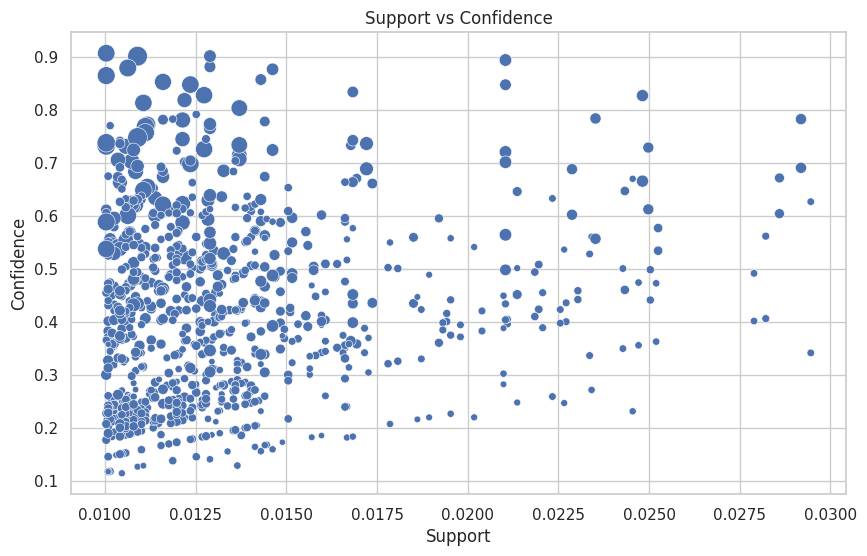

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of support vs confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules, legend=False, sizes=(20, 200))
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


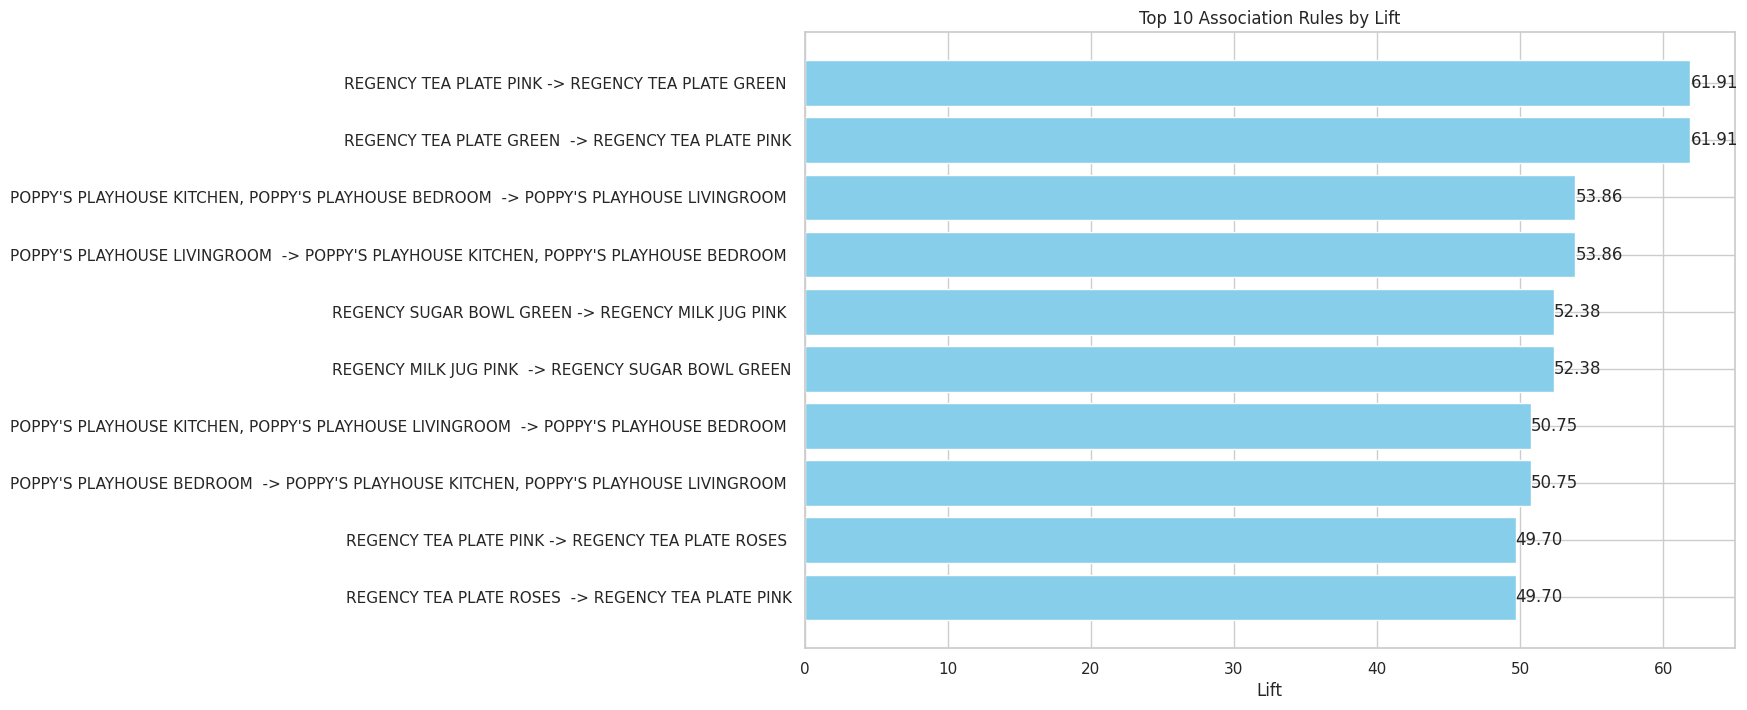

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume `rules` is already generated as per your provided code
# Sort the rules by lift and select the top 10
top_10_rules = rules.nlargest(10, 'lift')

# Convert the antecedents and consequents to string for better visualization
top_10_rules['antecedents'] = top_10_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
top_10_rules['consequents'] = top_10_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Create the bar plot
plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(top_10_rules)), top_10_rules['lift'], color='skyblue')
plt.yticks(range(len(top_10_rules)), [f"{row['antecedents']} -> {row['consequents']}" for index, row in top_10_rules.iterrows()])
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest lift at the top

# Add value labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center')

plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


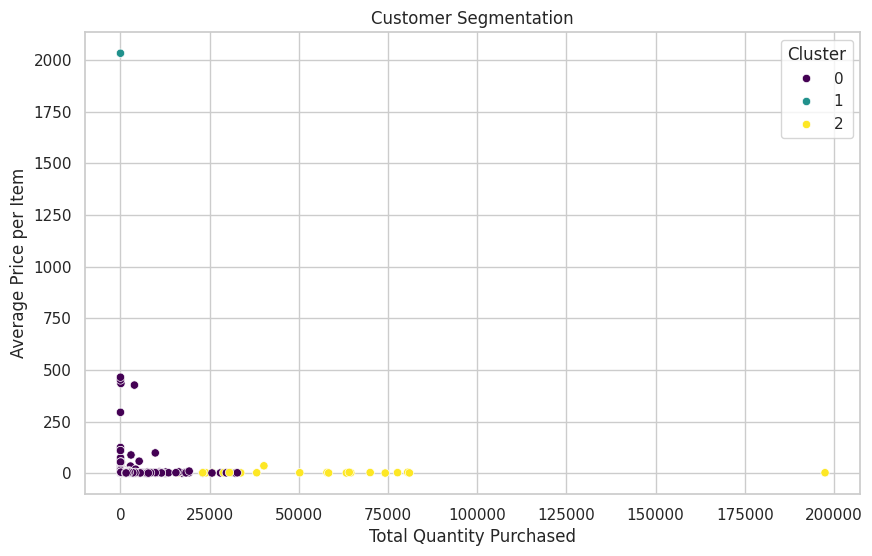

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Aggregate data by CustomerID
customer_data = data.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Number of unique invoices
    'Quantity': 'sum',       # Total quantity of items bought
    'UnitPrice': 'mean',     # Average price per item
    'Country': 'first'       # Country of the customer
}).reset_index()

# Rename columns for clarity
customer_data.columns = ['CustomerID', 'NumOrders', 'TotalQuantity', 'AvgPrice', 'Country']

# Standardize the data
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['NumOrders', 'TotalQuantity', 'AvgPrice']])

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='TotalQuantity', y='AvgPrice', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Average Price per Item')
plt.show()


In [ ]:
kmeans.predict([[1,2,3]])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0], dtype=int32)

In [20]:
# Define the reference date (e.g., the last date in the dataset)
reference_date = data['InvoiceDate'].max() + pd.DateOffset(days=1)

# Calculate RFM metrics
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'TotalSales': 'sum'    # Monetary
}).reset_index()

# Rename columns for clarity
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# Define quantiles for segmentation
quantiles = rfm.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()

# Function to segment customers
def rfm_segment(row):
    recency_score = pd.cut([row['Recency']], bins=[-float('inf')] + list(quantiles['Recency'].values()) + [float('inf')],
                          labels=[1, 2, 3, 4], include_lowest=True)[0]
    frequency_score = pd.cut([row['Frequency']], bins=[-float('inf')] + list(quantiles['Frequency'].values()) + [float('inf')],
                             labels=[1, 2, 3, 4], include_lowest=True)[0]
    monetary_score = pd.cut([row['Monetary']], bins=[-float('inf')] + list(quantiles['Monetary'].values()) + [float('inf')],
                            labels=[1, 2, 3, 4], include_lowest=True)[0]

    return int(recency_score) + int(frequency_score) + int(monetary_score)

# Apply segmentation
rfm['RFMScore'] = rfm.apply(rfm_segment, axis=1)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
print(rfm)

      CustomerID  Recency  Frequency  Monetary  RFMScore              Segment
0        12346.0      326          1  77183.60         9       Best Customers
1        12347.0        2        182   4310.00         9       Best Customers
2        12348.0       75         31   1797.24         9       Best Customers
3        12349.0       19         73   1757.55         9       Best Customers
4        12350.0      310         17    334.40         7      Loyal Customers
...          ...      ...        ...       ...       ...                  ...
4334     18280.0      278         10    180.60         6  Potential Loyalists
4335     18281.0      181          7     80.82         6  Potential Loyalists
4336     18282.0        8         12    178.05         3        New Customers
4337     18283.0        4        756   2094.88         9       Best Customers
4338     18287.0       43         70   1837.28         9       Best Customers

[4339 rows x 6 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
# Define segment names based on RFM score
def rfm_segment_name(score):
    if score >= 9:
        return 'Best Customers'
    elif score >= 7:
        return 'Loyal Customers'
    elif score >= 5:
        return 'Potential Loyalists'
    else:
        return 'New Customers'

# Apply segment names
rfm['Segment'] = rfm['RFMScore'].apply(rfm_segment_name)

# Analyze segments
print(rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}))


                        Recency   Frequency     Monetary
Segment                                                 
Best Customers        68.567416  205.787921  4774.820359
Loyal Customers      105.718033   52.715410   984.805975
New Customers         21.701245   11.136929   199.449834
Potential Loyalists  119.536118   18.979112   489.266485


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


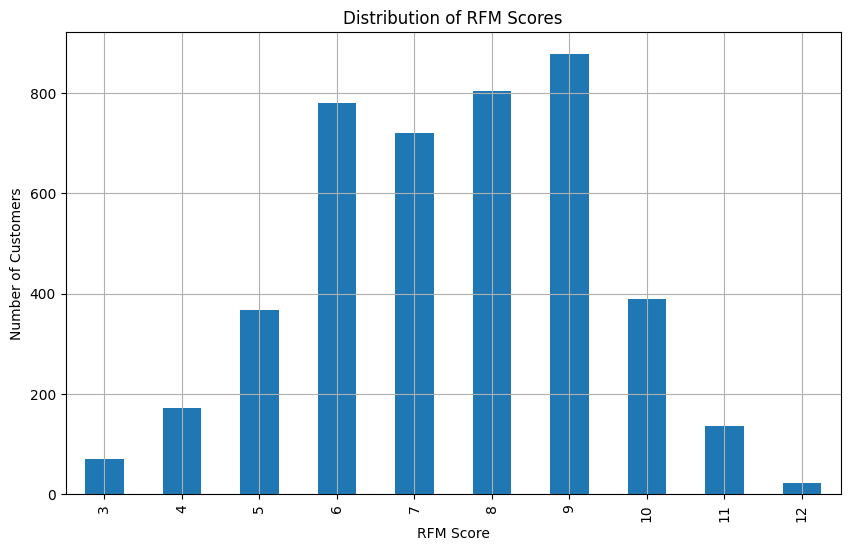

In [26]:
import matplotlib.pyplot as plt

# Plot RFM Score Distribution
plt.figure(figsize=(10, 6))
rfm['RFMScore'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of RFM Scores')
plt.xlabel('RFM Score')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


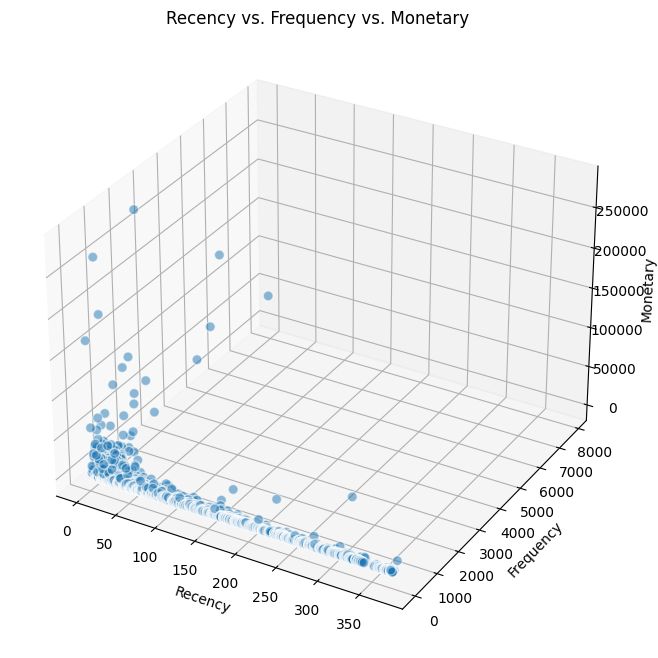

In [27]:
from mpl_toolkits.mplot3d import Axes3D

# Plot Recency vs. Frequency vs. Monetary
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], alpha=0.5, edgecolors='w', s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Recency vs. Frequency vs. Monetary')

plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


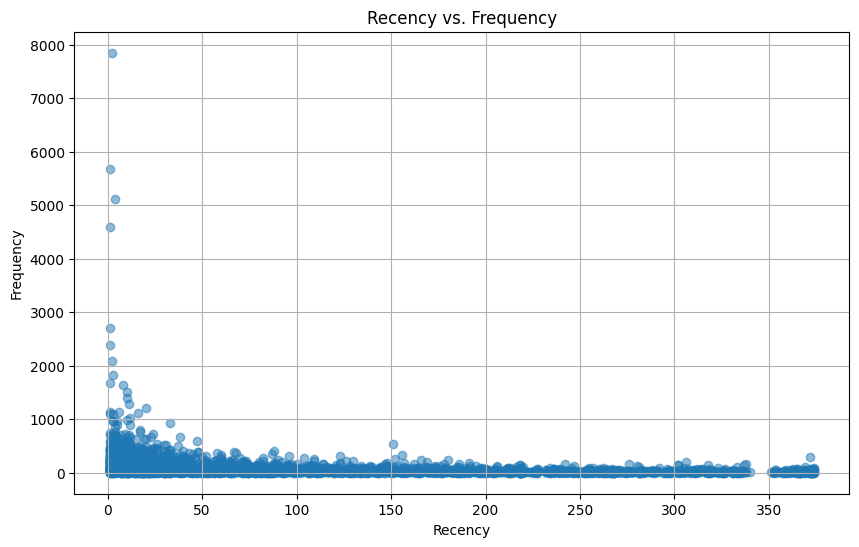

In [28]:
# Plot Recency vs. Frequency
plt.figure(figsize=(10, 6))
plt.scatter(rfm['Recency'], rfm['Frequency'], alpha=0.5)
plt.title('Recency vs. Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


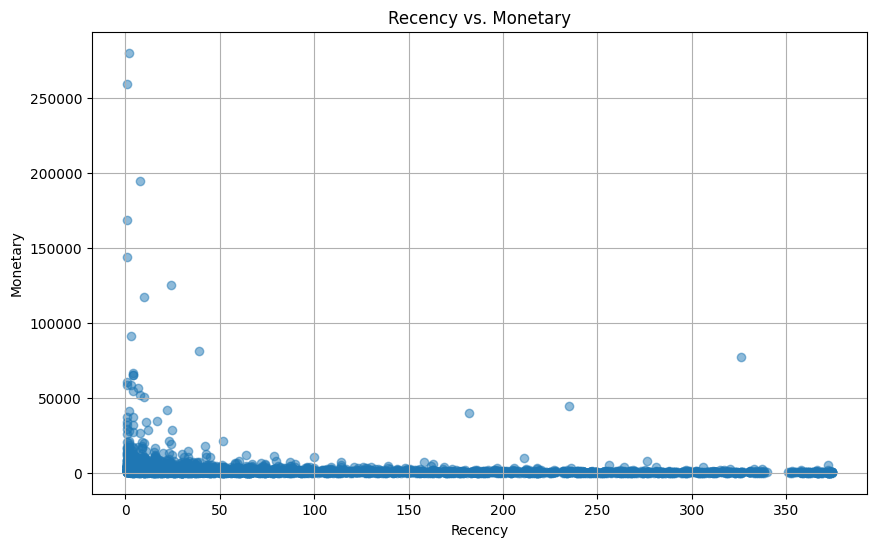

In [29]:
# Plot Recency vs. Monetary
plt.figure(figsize=(10, 6))
plt.scatter(rfm['Recency'], rfm['Monetary'], alpha=0.5)
plt.title('Recency vs. Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


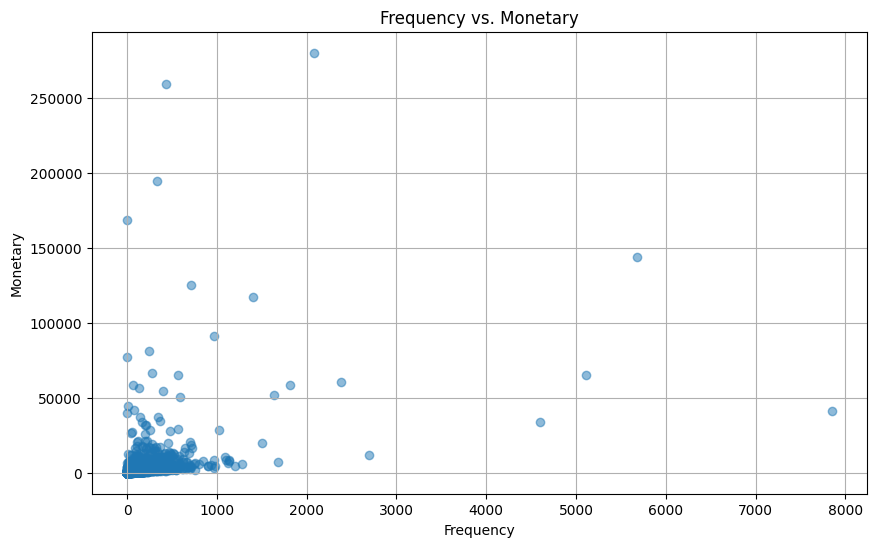

In [30]:
# Plot Frequency vs. Monetary
plt.figure(figsize=(10, 6))
plt.scatter(rfm['Frequency'], rfm['Monetary'], alpha=0.5)
plt.title('Frequency vs. Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.grid(True)
plt.show()


In [33]:
rfm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Recency,Frequency,Monetary,RFMScore,Segment
0,12346.0,326,1,77183.60,9,Best Customers
1,12347.0,2,182,4310.00,9,Best Customers
2,12348.0,75,31,1797.24,9,Best Customers
3,12349.0,19,73,1757.55,9,Best Customers
4,12350.0,310,17,334.40,7,Loyal Customers
...,...,...,...,...,...,...
4334,18280.0,278,10,180.60,6,Potential Loyalists
4335,18281.0,181,7,80.82,6,Potential Loyalists
4336,18282.0,8,12,178.05,3,New Customers
4337,18283.0,4,756,2094.88,9,Best Customers


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


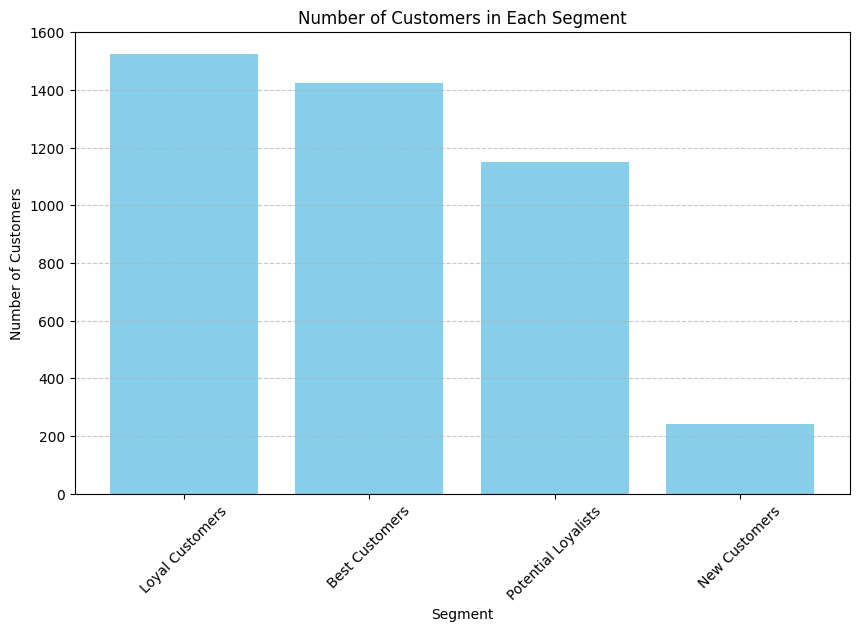

In [40]:
segment_counts = rfm['Segment'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(segment_counts.index, segment_counts.values, color='skyblue')
plt.title('Number of Customers in Each Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [43]:
segment_counts.index

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Loyal Customers', 'Best Customers', 'Potential Loyalists',
       'New Customers'],
      dtype='object', name='Segment')

In [45]:
segment_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Segment
Loyal Customers        1525
Best Customers         1424
Potential Loyalists    1149
New Customers           241
Name: count, dtype: int64

In [47]:
def segment_customers(df, metric, quantiles):
    return pd.cut(df[metric],
                  bins=[-float('inf')] + list(quantiles) + [float('inf')],
                  labels=['Low', 'Medium', 'High', 'Very High'],
                  include_lowest=True)

# Apply segmentation
rfm['RecencySegment'] = segment_customers(rfm, 'Recency', quantiles['Recency'])
rfm['FrequencySegment'] = segment_customers(rfm, 'Frequency', quantiles['Frequency'])
rfm['MonetarySegment'] = segment_customers(rfm, 'Monetary', quantiles['Monetary'])

# Define criteria for safety
# Example criteria: Safe if more than 50% of customers are 'High' or 'Very High' in Frequency and Monetary
def check_organization_safety(rfm_df):
    high_frequency_count = rfm_df['FrequencySegment'].isin(['High', 'Very High']).sum()
    high_monetary_count = rfm_df['MonetarySegment'].isin(['High', 'Very High']).sum()

    total_customers = len(rfm_df)

    high_frequency_percentage = (high_frequency_count / total_customers) * 100
    high_monetary_percentage = (high_monetary_count / total_customers) * 100

    # Define safety thresholds
    frequency_threshold = 50  # 50% of customers should be High or Very High in Frequency
    monetary_threshold = 50   # 50% of customers should be High or Very High in Monetary

    # Check if organization meets the safety criteria
    is_safe = high_frequency_percentage > frequency_threshold and high_monetary_percentage > monetary_threshold
    return is_safe, high_frequency_percentage, high_monetary_percentage

# Determine if the organization is safe
is_safe, high_frequency_percentage, high_monetary_percentage = check_organization_safety(rfm)

# Print results
print(f"Is the organization safe? {'Yes' if is_safe else 'No'}")
print(f"Percentage of customers with High/Very High Frequency: {high_frequency_percentage:.2f}%")
print(f"Percentage of customers with High/Very High Monetary: {high_monetary_percentage:.2f}%")


Is the organization safe? Yes
Percentage of customers with High/Very High Frequency: 100.00%
Percentage of customers with High/Very High Monetary: 99.98%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
